In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import math

### data 1 compression - nofilter data

In [2]:
file = '4b5c_nofilter.edf'
data1 = mne.io.read_raw_edf(file)
data1.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/EEG data/4b5c_nofilter.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,6 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [23]:
data1.ch_names

['ch1_LF5-FpZ',
 'ch2_OTE_L-FpZ',
 'ch3_BE_L-FpZ',
 'ch4_RF6-FpZ',
 'ch5_OTE_R-FpZ',
 'ch6_BE_R-FpZ']

Setting up low-pass filter at 60 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoff at 60.00 Hz: -6.02 dB



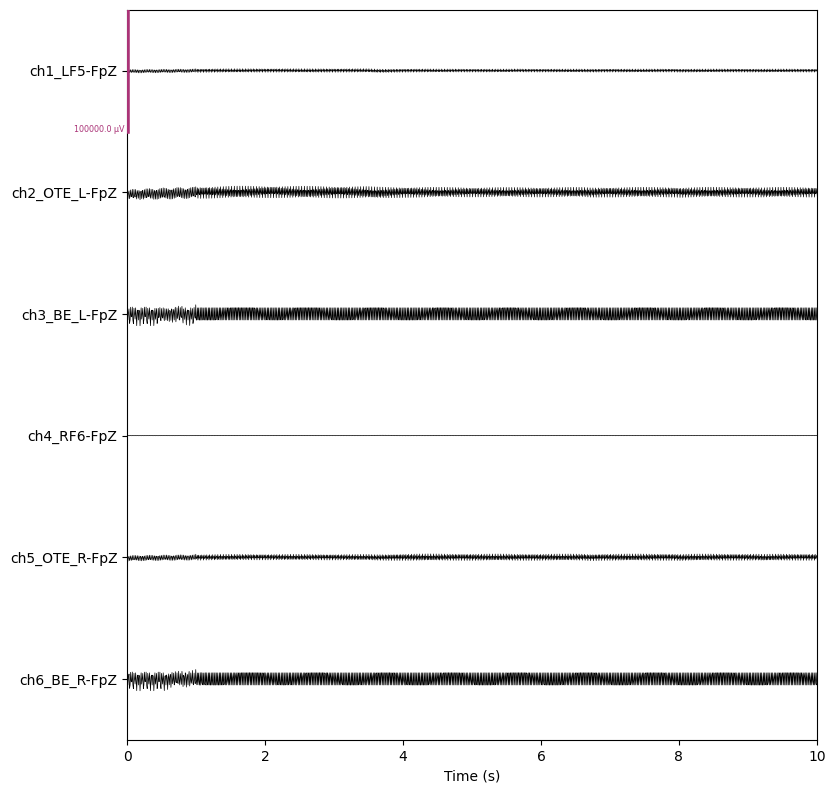

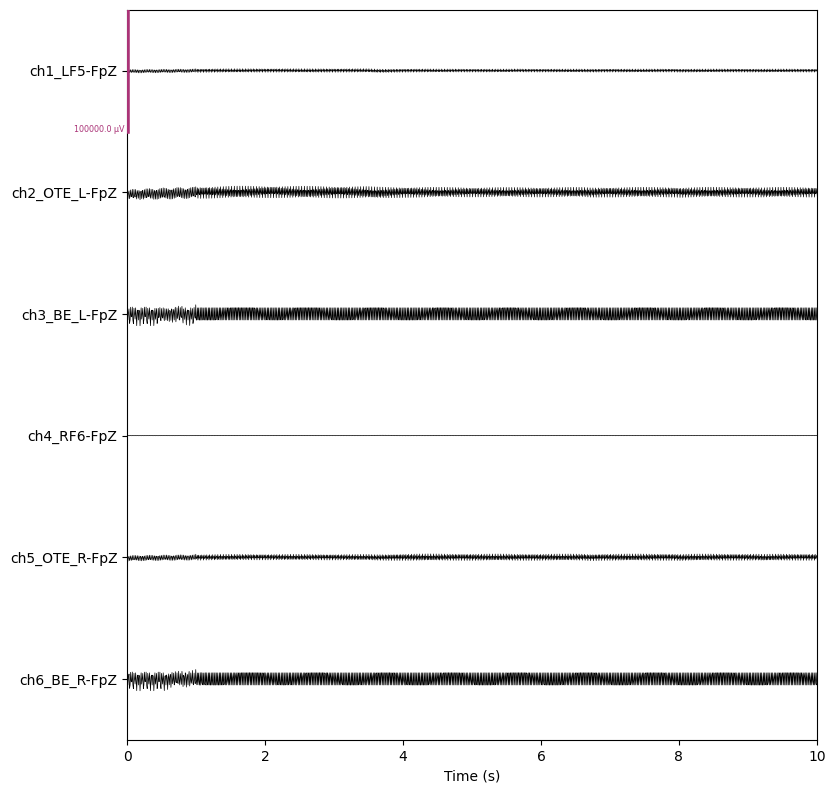

In [22]:
data1.plot( start=0,  scalings='0.05', clipping=1.0, remove_dc= False, lowpass =60, show_scrollbars=False, filtorder = 12)

In [24]:
data1.pick_channels(['ch1_LF5-FpZ','ch2_OTE_L-FpZ',  'ch4_RF6-FpZ', 'ch5_OTE_R-FpZ'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [25]:
data1

Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [38]:
EEG_raw_data  = data1.get_data()
SCALE=1e5 ## sclaed by 100000
raw_data= EEG_raw_data*SCALE

In [39]:
raw_data.min(), raw_data.max(), raw_data.mean()

(-613.4993759060044, 1034.9753643091478, -0.361212972918461)

### making the data non_neg

In [44]:
raw_data[0].min()

-579.4260929274433

In [45]:
non_neg_val = []
for val in raw_data[0]:
    val += 580
    non_neg_val.append(val)

In [50]:
np_non_neg_val = np.array(non_neg_val)
np_non_neg_val.min()

0.5739070725567217